In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic.csv', usecols= ['Age', 'Fare', 'Survived'])

In [4]:
df.dropna(inplace= True)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [8]:
x, y

(      Age     Fare
 0    22.0   7.2500
 1    38.0  71.2833
 2    26.0   7.9250
 3    35.0  53.1000
 4    35.0   8.0500
 ..    ...      ...
 885  39.0  29.1250
 886  27.0  13.0000
 887  19.0  30.0000
 889  26.0  30.0000
 890  32.0   7.7500
 
 [714 rows x 2 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 714, dtype: int64)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41, stratify = y)

In [10]:
clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.6223776223776224

In [14]:
np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv=10, scoring='accuracy'))

np.float64(0.6303012519561815)

In [16]:
kbin_age  = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')

In [17]:
trnf = ColumnTransformer([
    ('first', kbin_age, ['Age']),
    ('second', kbin_fare, ['Fare'])
])

In [18]:
x_train_trnf = trnf.fit_transform(x_train)
x_test_trnf = trnf.transform(x_test)

In [19]:
trnf.named_transformers_['first'].bin_edges_   # trnf.named_transformers_['second'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.  , 31.  , 35.  , 40.5 ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [20]:
clf = DecisionTreeClassifier()

clf.fit(x_train_trnf, y_train)
y_pred = clf.predict(x_test_trnf)

In [21]:
accuracy_score(y_test, y_pred)


0.6503496503496503

In [25]:
def discretize(bins, strategy):

    from sklearn.pipeline import Pipeline

    # =======================
    # load & prepare data
    # =======================
    df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
    df.dropna(inplace=True)

    x = df.drop('Survived', axis=1)
    y = df['Survived']

    # =======================
    # pipeline (IMPORTANT FIX)
    # =======================
    pipe = Pipeline([
        ('binning', ColumnTransformer([
            ('age', KBinsDiscretizer(
                n_bins=bins,
                encode='ordinal',
                strategy=strategy
            ), ['Age']),
            ('fare', KBinsDiscretizer(
                n_bins=bins,
                encode='ordinal',
                strategy=strategy
            ), ['Fare'])
        ])),
        ('model', DecisionTreeClassifier())
    ])

    # =======================
    # proper cross validation
    # =======================
    score = np.mean(
        cross_val_score(pipe, x, y, cv=10, scoring='accuracy')
    )

    print(f'cv accuracy ({bins} bins, {strategy}):', score)

    # =======================
    # visualisation
    # =======================
    x_trnf = pipe.named_steps['binning'].fit_transform(x)

    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Age - Before')

    plt.subplot(122)
    plt.hist(x_trnf[:, 0], color='red')
    plt.title('Age - After')
    plt.show()

    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Fare - Before')

    plt.subplot(122)
    plt.hist(x_trnf[:, 1], color='red')
    plt.title('Fare - After')
    plt.show()


cv accuracy (10 bins, quantile): 0.6738458528951486


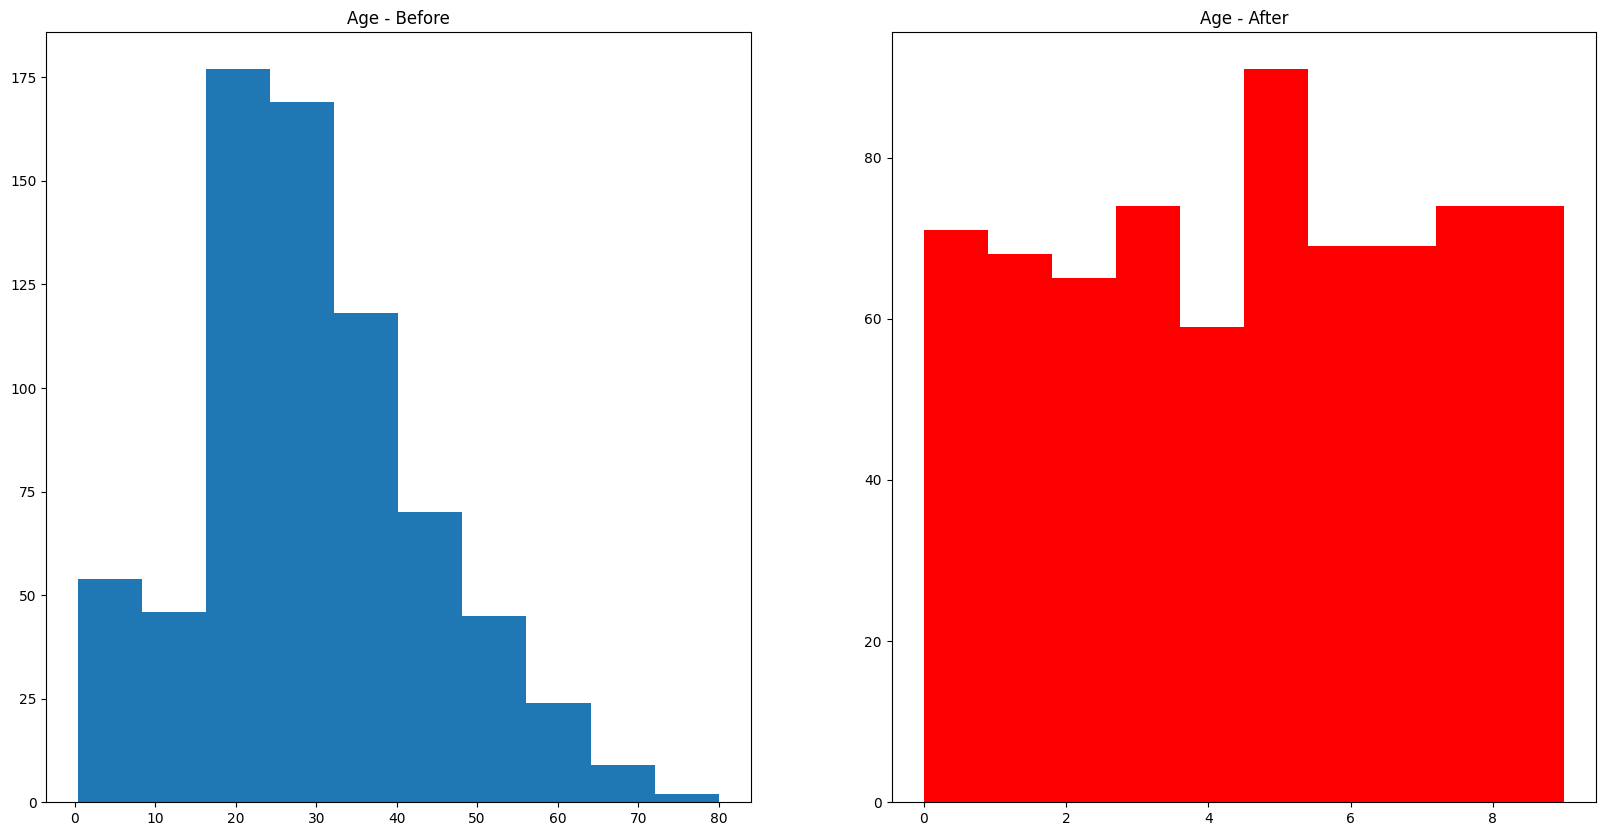

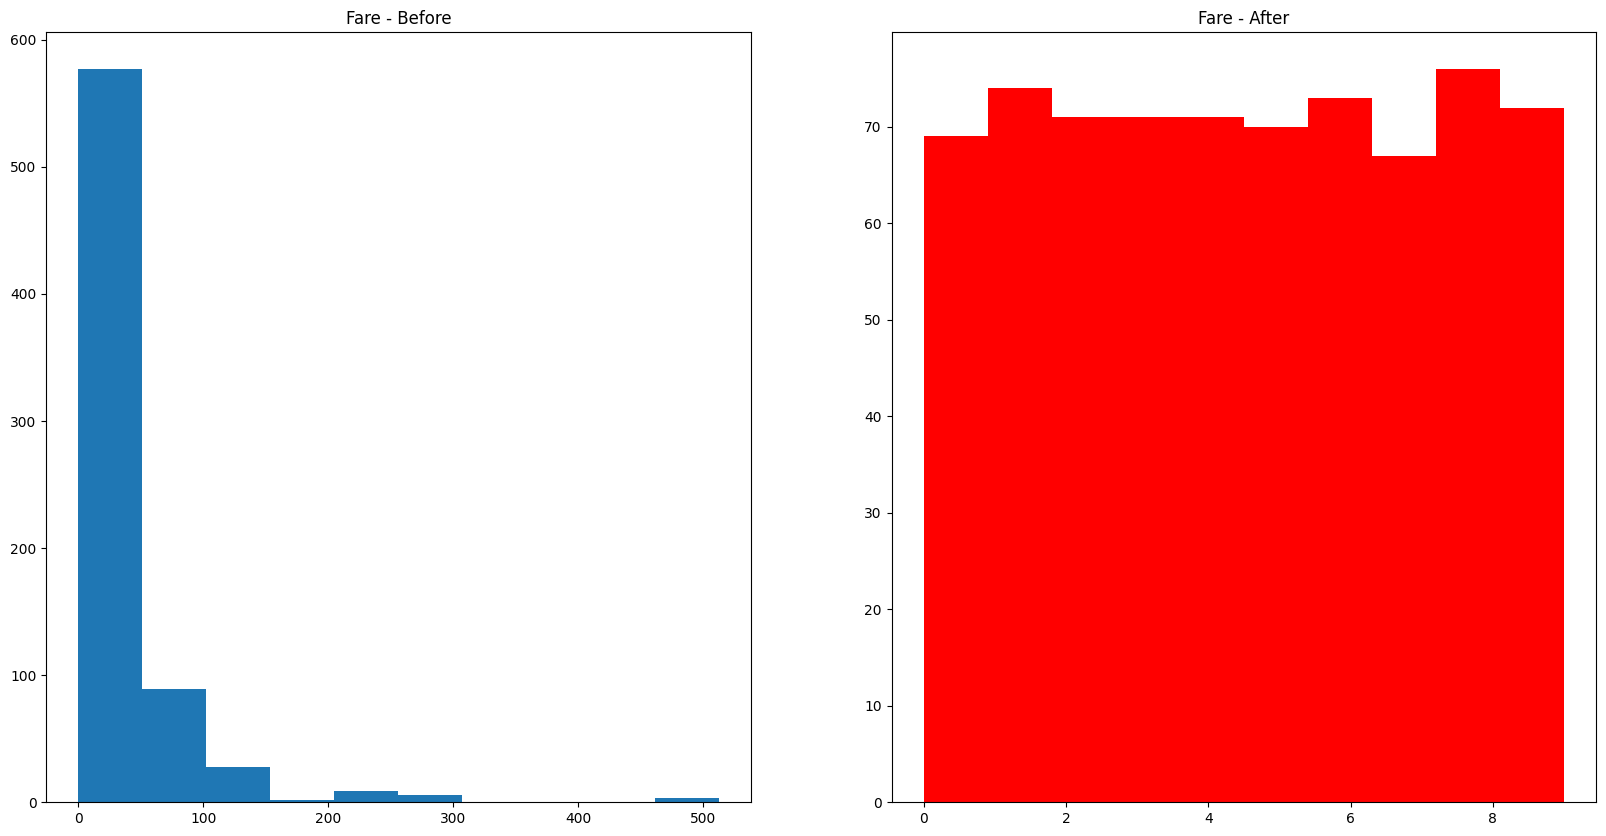

In [26]:
discretize(10, 'quantile')

cv accuracy (5 bins, uniform): 0.6316510172143975


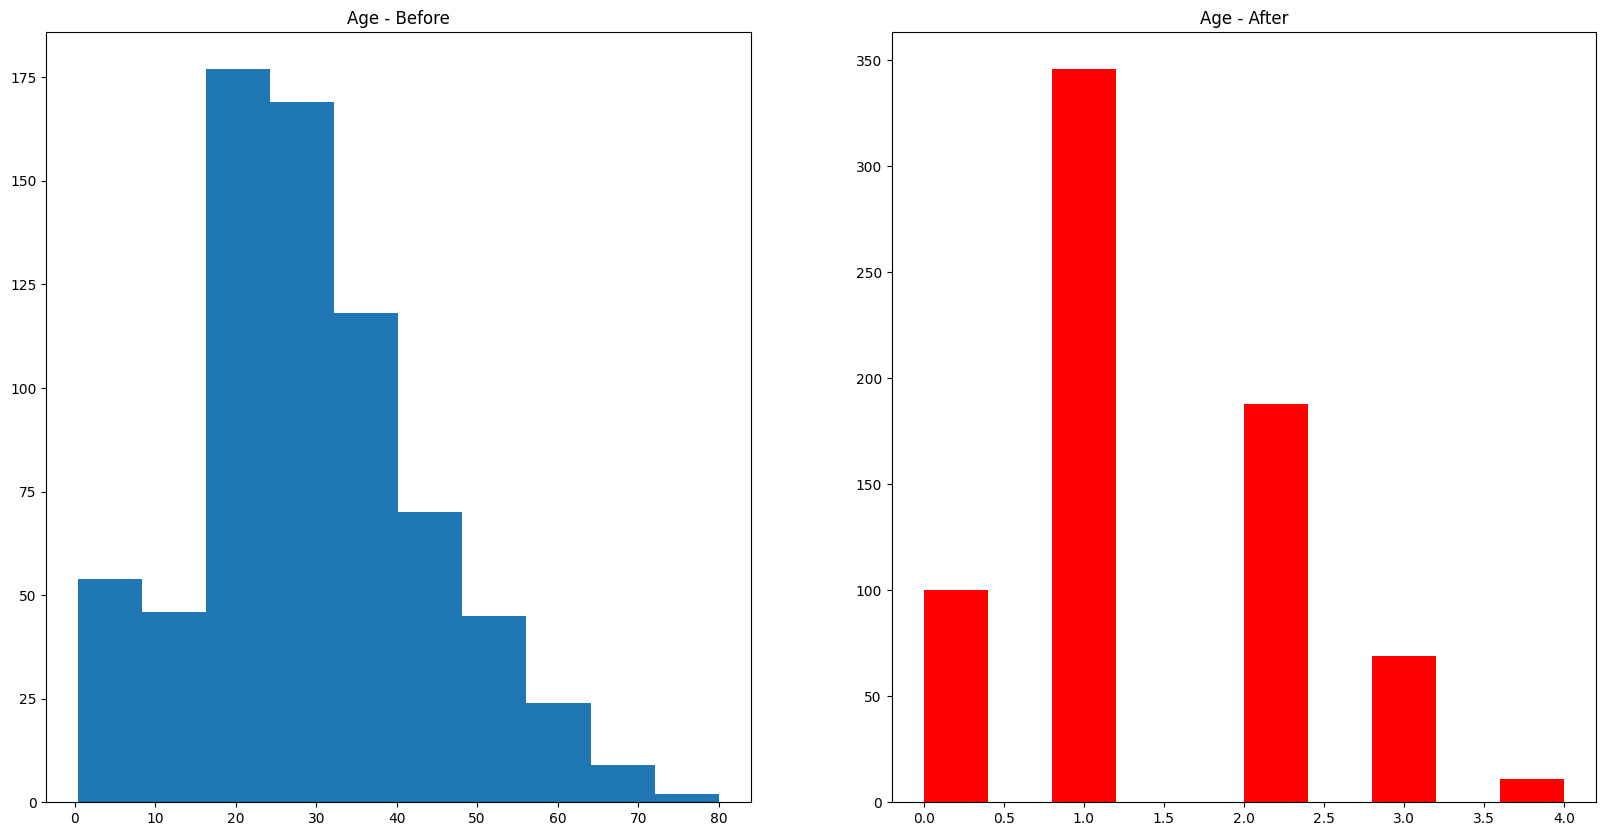

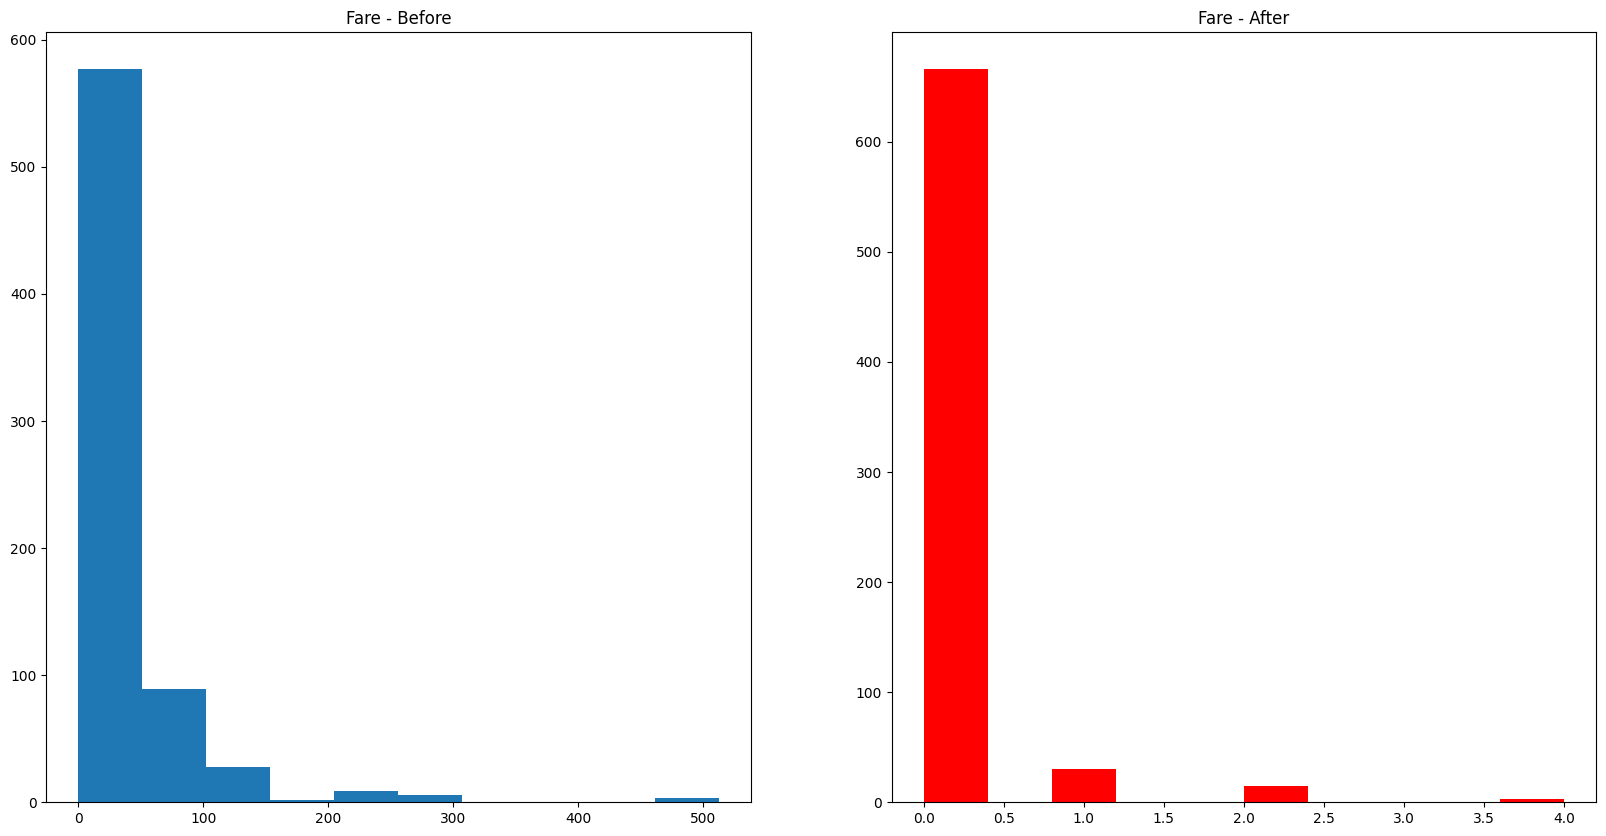

In [27]:

discretize(5, 'uniform')
